In [12]:
import seaborn as sns
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import pandas as pd
plt.rcParams['figure.figsize'] = (13, 5)

In [16]:
x, sr = librosa.load('data/31738.mp3', offset=25, duration=40)

In [17]:
# sample rate
print(sr)

22050


In [18]:
#Nếu duration > 40s: chạy command phía dưới để load được cả file:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
ipd.Audio(x, rate=sr)

In [19]:
X = librosa.feature.mfcc(x, sr)

In [20]:
X.shape

(20, 1723)

In [21]:
X = sklearn.preprocessing.scale(X)

In [22]:
X.mean()

8.2477392427173559e-19

In [26]:
features = pd.DataFrame(X.T,columns=('1','2','3','4','5','6','7','8','9','10',
                                     '11','12','13','14','15','16','17','18','19','20'))

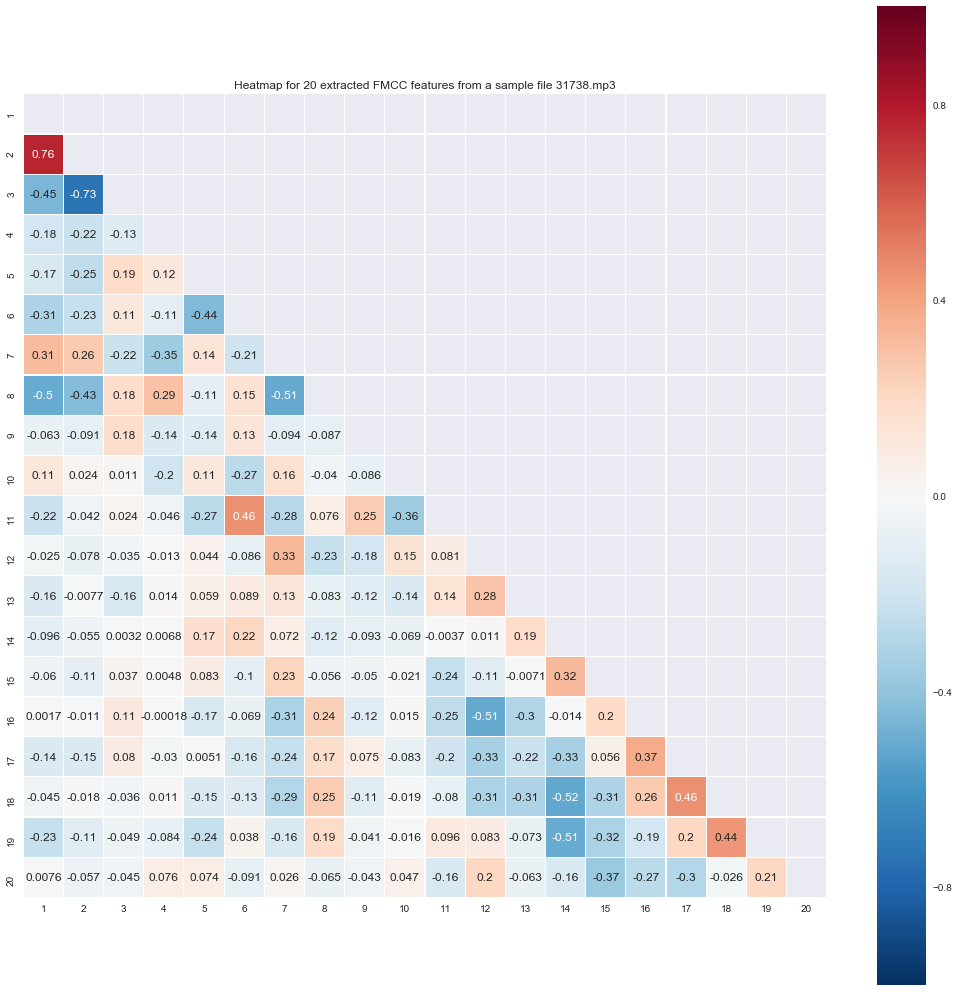

In [27]:
corr = features.corr(method='pearson', min_periods=1)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig1, ax = plt.subplots(figsize=(18,18)) 
sns.heatmap(corr, mask=mask, square=True, ax=ax, linewidths=0.1, annot=True)
ax.set_title('Heatmap for 20 extracted FMCC features from a sample file 31738.mp3')
plt.show()

In [50]:
df = pd.read_csv('out_1_4000.csv')
df.columns

Index(['artist', 'country', 'date_recorded', 'download_link', 'file_type',
       'gender', 'is_duet', 'language', 'location', 'no_of_comments',
       'no_of_followers', 'no_of_following', 'no_of_likes', 'no_of_recordings',
       'no_of_views', 'recording_id', 'recording_link', 'song_title',
       'user_avatar', 'user_group', 'user_name', 'days'],
      dtype='object')

In [68]:
data_4000 = df[['recording_id', 'date_recorded', 'days', 'no_of_views', 'no_of_likes', 'file_type', 
                'user_name', 'no_of_recordings', 'no_of_followers', 'no_of_following', 'gender', 'country', 'language', 'user_group', 'download_link']]

In [114]:
data_4000.head(100)

,recording_id,date_recorded,days,no_of_views,no_of_likes,file_type,user_name,no_of_recordings,no_of_followers,no_of_following,gender,country,language,user_group,download_link
0,950319,2016-12-15,312,11,2,vid,111ella,2,5,0,woman,USA,en,2,https://s3.amazonaws.com/redkaraokecom/data/vi...
1,1071596,2011-05-30,2338,161,4,mp3,ennacastillo,4,0,0,woman,Mexico,es,2,https://s3.amazonaws.com/redkaraoke/data/mp3/1...
2,2152317,2016-11-07,350,17,2,mp3,LUVIBO,12673,587,7,man,Spain,es,9,https://s3.amazonaws.com/redkaraoke/data/mp3/1...
3,827490,2016-08-14,435,116,2,mp3,anlcite,8,8,9,NaN,India,en,2,https://s3.amazonaws.com/redkaraokecom/data/mp...
4,913537,2016-11-07,350,150,7,vid,reksane_1,6,14,0,woman,Germany,en,2,https://s3.amazonaws.com/redkaraokecom/data/vi...
5,304084,2016-03-03,599,68,7,mp3,namu_fukashigi,4572,83,93,man,Japan,jp,9,https://s3.amazonaws.com/redkaraokejp/data/mp3...
6,1206169,2017-09-26,27,132,5,vid,Diva_36,1,0,0,NaN,India,en,2,https://s3.amazonaws.com/redkaraokecom/data/vi...
7,745170,2016-06-07,503,31,2,vid,TiaSudar,12,258,3,woman,Slovenia,en,2,https://s3.amazonaws.com/redkaraokecom/data/vi...
8,319319,2016-11-16,341,336,22,vid,yasumiyo,862,337,417,man,Japan,jp,9,https://s3.amazonaws.com/redkaraokejp/data/vid...
9,1761169,2015-03-05,963,216,20,vid,-Mey-,125,154,10,woman,Spain,es,2,https://www.redkaraoke.com/data/vid/es/11827/5...


In [72]:
data_4000.shape

(3910, 15)

In [73]:
df.columns

Index(['artist', 'country', 'date_recorded', 'download_link', 'file_type',
       'gender', 'is_duet', 'language', 'location', 'no_of_comments',
       'no_of_followers', 'no_of_following', 'no_of_likes', 'no_of_recordings',
       'no_of_views', 'recording_id', 'recording_link', 'song_title',
       'user_avatar', 'user_group', 'user_name', 'days'],
      dtype='object')

In [79]:
df['no_of_likes'] = df['no_of_likes']+1
np.log(df['no_of_likes'])

0       1.386294
1       1.791759
2       1.386294
3       1.386294
4       2.197225
5       2.197225
6       1.945910
7       1.386294
8       3.178054
9       3.091042
10      3.044522
11      2.079442
12      1.609438
13      1.609438
14      1.945910
15      1.386294
16      2.302585
17      1.945910
18      1.386294
19      1.609438
20      1.791759
21      2.708050
22      2.564949
23      1.386294
24      2.197225
25      3.044522
26      2.079442
27      2.484907
28      2.079442
29      2.302585
          ...   
3880    0.693147
3881    0.693147
3882    0.693147
3883    0.693147
3884    0.693147
3885    0.693147
3886    0.693147
3887    0.693147
3888    0.693147
3889    0.693147
3890    0.693147
3891    0.693147
3892    0.693147
3893    0.693147
3894    0.693147
3895    0.693147
3896    0.693147
3897    0.693147
3898    0.693147
3899    0.693147
3900    0.693147
3901    0.693147
3902    0.693147
3903    0.693147
3904    0.693147
3905    0.693147
3906    0.693147
3907    0.6931

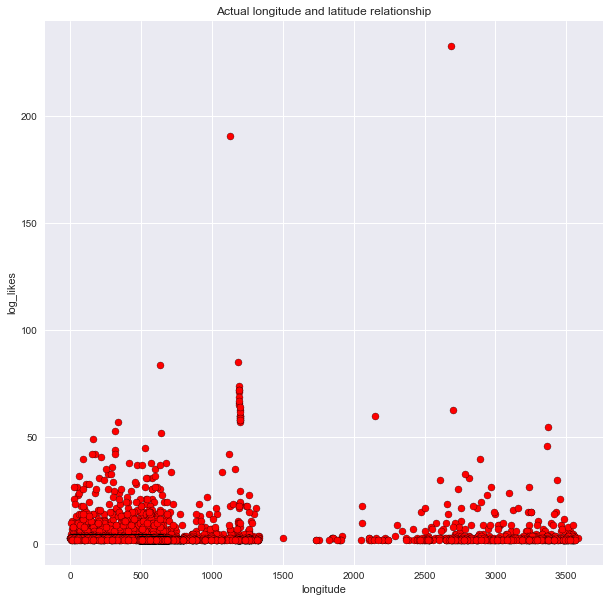

In [136]:
plt.subplots(figsize=(10,10))
plt.ylabel('log_likes')
plt.xlabel('longitude')
plt.scatter(df['days'], df['no_of_likes'],  color='red', edgecolors='black')
plt.title('Actual longitude and latitude relationship' )
plt.show()

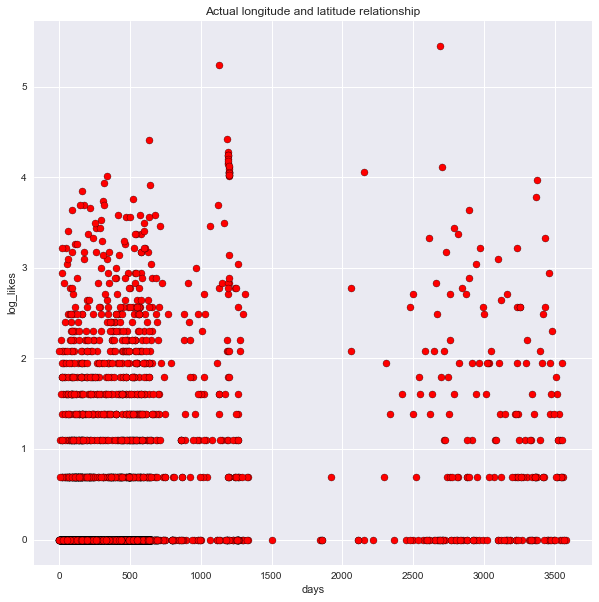

In [82]:
plt.subplots(figsize=(10,10))
plt.ylabel('log_likes')
plt.xlabel('days')
plt.scatter(df['days'], df['log_likes'],  color='red', edgecolors='black')
plt.title('Actual longitude and latitude relationship' )
plt.show()

In [85]:
df1 = df[['days','no_of_likes']]

In [89]:
df1

,days,no_of_likes
0,312,4
1,2338,6
2,350,4
3,435,4
4,350,9
5,599,9
6,27,7
7,503,4
8,341,24
9,963,22


In [127]:
print(df1['no_of_likes'].groupby(pd.cut(df1['days'], np.arange(0, 4000, 100))).mean())

days
(0, 100]         4.755435
(100, 200]       4.481319
(200, 300]       4.561254
(300, 400]       5.229167
(400, 500]       4.420945
(500, 600]       4.069065
(600, 700]       3.858447
(700, 800]       3.558140
(800, 900]       3.311111
(900, 1000]      5.051282
(1000, 1100]     5.518519
(1100, 1200]    20.404040
(1200, 1300]     4.138889
(1300, 1400]     3.400000
(1400, 1500]     3.000000
(1500, 1600]          NaN
(1600, 1700]          NaN
(1700, 1800]     2.000000
(1800, 1900]     2.571429
(1900, 2000]     2.500000
(2000, 2100]    10.000000
(2100, 2200]     7.545455
(2200, 2300]     2.500000
(2300, 2400]     4.400000
(2400, 2500]     4.352941
(2500, 2600]     3.388889
(2600, 2700]    12.322581
(2700, 2800]     6.255814
(2800, 2900]     5.692308
(2900, 3000]     5.366667
(3000, 3100]     4.464286
(3100, 3200]     3.806452
(3200, 3300]     4.813953
(3300, 3400]     5.585366
(3400, 3500]     4.795455
(3500, 3600]     3.350000
(3600, 3700]          NaN
(3700, 3800]          NaN
(3800, 

In [128]:
print(df1['no_of_likes'].groupby(pd.cut(df1['days'], np.arange(0, 4000, 100))).size())

days
(0, 100]        368
(100, 200]      455
(200, 300]      351
(300, 400]      288
(400, 500]      487
(500, 600]      695
(600, 700]      438
(700, 800]       86
(800, 900]       45
(900, 1000]      39
(1000, 1100]     27
(1100, 1200]     99
(1200, 1300]     72
(1300, 1400]     15
(1400, 1500]      1
(1500, 1600]      0
(1600, 1700]      0
(1700, 1800]      3
(1800, 1900]      7
(1900, 2000]      4
(2000, 2100]      3
(2100, 2200]     11
(2200, 2300]      6
(2300, 2400]      5
(2400, 2500]     17
(2500, 2600]     18
(2600, 2700]     31
(2700, 2800]     43
(2800, 2900]     39
(2900, 3000]     30
(3000, 3100]     28
(3100, 3200]     31
(3200, 3300]     43
(3300, 3400]     41
(3400, 3500]     44
(3500, 3600]     40
(3600, 3700]      0
(3700, 3800]      0
(3800, 3900]      0
Name: no_of_likes, dtype: int64


In [135]:
mask = (df1['days'] >= 1100) & (df1['days'] <= 1200)
data_4000.loc[mask]

,recording_id,date_recorded,days,no_of_views,no_of_likes,file_type,user_name,no_of_recordings,no_of_followers,no_of_following,gender,country,language,user_group,download_link
109,346267,2014-07-24,1187,109,9,mp3,mdieaj,994,472,334,woman,USA,en,2,https://s3.amazonaws.com/redkaraokecom/data/mp...
114,343824,2014-07-17,1194,48,2,mp3,habby-lynda,300,339,116,woman,Canada,en,2,https://s3.amazonaws.com/redkaraokecom/data/mp...
163,342519,2014-07-14,1197,87,56,mp3,n1angel4u,3686,3815,82,woman,USA,en,9,https://s3.amazonaws.com/redkaraokecom/data/mp...
178,360286,2014-08-27,1153,96,3,mp3,deynoa,50,223,2,woman,USA,en,2,https://s3.amazonaws.com/redkaraokecom/data/mp...
180,345324,2014-07-21,1190,196,72,mp3,n1angel4u,3686,3815,82,woman,USA,en,9,https://s3.amazonaws.com/redkaraokecom/data/mp...
190,356458,2014-08-15,1165,106,33,vid,Angelsoft,2594,1584,283,woman,USA,en,2,https://s3.amazonaws.com/redkaraokecom/data/vi...
199,347896,2014-07-27,1184,95,8,mp3,Daveatty58,1620,476,111,man,USA,en,2,https://s3.amazonaws.com/redkaraokecom/data/mp...
201,367010,2014-09-20,1129,187,16,mp3,nijyo,376,409,358,man,Japan,en,9,https://s3.amazonaws.com/redkaraokecom/data/mp...
211,343825,2014-07-17,1194,197,70,mp3,n1angel4u,3686,3815,82,woman,USA,en,9,https://s3.amazonaws.com/redkaraokecom/data/mp...
224,345160,2014-07-21,1190,182,69,mp3,n1angel4u,3686,3815,82,woman,USA,en,9,https://s3.amazonaws.com/redkaraokecom/data/mp...
